# Testing Stuff related to Volatility

In [1]:
from src import data_fetcher
import pandas as pd

In [2]:
data : pd.MultiIndex = data_fetcher.fetch_ohlcv(["NVDA", "AAPL"], "2024-01-01", "2024-12-31")
data.to_excel("NVDA_AAPL_ohlcv.xlsx")
data.head()

[*********************100%***********************]  2 of 2 completed


,Price,Open,High,Low,Close,Adj Close,Volume
Date,Ticker,,,,,,
2024-01-02,NVDA,49.243999,49.294998,47.595001,48.167999,48.146572,411254000
2024-01-03,NVDA,47.485001,48.183998,47.320000,47.569000,47.547840,320896000
2024-01-04,NVDA,47.766998,48.500000,47.507999,47.998001,47.976650,306535000
2024-01-05,NVDA,48.462002,49.547001,48.306000,49.097000,49.075153,415039000
2024-01-08,NVDA,49.512001,52.275002,49.479000,52.252998,52.229752,642510000


In [3]:
data['Adj Close'].head()

Date        Ticker
2024-01-02  NVDA      48.146572
2024-01-03  NVDA      47.547840
2024-01-04  NVDA      47.976650
2024-01-05  NVDA      49.075153
2024-01-08  NVDA      52.229752
Name: Adj Close, dtype: float64

In [4]:
daily_return_pct = data['Adj Close'].pct_change()
daily_return_pct

Date        Ticker
2024-01-02  NVDA           NaN
2024-01-03  NVDA     -0.012436
2024-01-04  NVDA      0.009018
2024-01-05  NVDA      0.022897
2024-01-08  NVDA      0.064281
                        ...   
2024-12-23  AAPL      0.003065
2024-12-24  AAPL      0.011478
2024-12-26  AAPL      0.003176
2024-12-27  AAPL     -0.013242
2024-12-30  AAPL     -0.013263
Name: Adj Close, Length: 502, dtype: float64

In [5]:
import numpy as np
daily_return_log = np.log(data['Adj Close'] / data['Adj Close'].shift(1))
daily_return_log

Date        Ticker
2024-01-02  NVDA           NaN
2024-01-03  NVDA     -0.012514
2024-01-04  NVDA      0.008978
2024-01-05  NVDA      0.022638
2024-01-08  NVDA      0.062299
                        ...   
2024-12-23  AAPL      0.003060
2024-12-24  AAPL      0.011413
2024-12-26  AAPL      0.003171
2024-12-27  AAPL     -0.013331
2024-12-30  AAPL     -0.013352
Name: Adj Close, Length: 502, dtype: float64

### DataFlow Example

In [6]:
from src.volatility import volatility_summary

In [7]:
tickers = ['AAPL', 'MSFT', 'NVDA']
ohlcv_data = data_fetcher.fetch_ohlcv(tickers, "2024-01-01", "2024-12-31")
sector_map = data_fetcher.get_sector_mapping(tickers)
benchmark_df = data_fetcher.fetch_index_data("^GSPC", "2024-01-01", "2024-12-31")

[                       0%                       ]

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


In [8]:
print("sector_map:")
print(sector_map)
print(f"\nType: {type(sector_map)}")
print(f"Shape: {sector_map.shape}")
print(f"Columns: {sector_map.columns.tolist()}")
print(f"Index: {sector_map.index}")
print(f"Data types: {sector_map.dtypes}")

sector_map:
  Ticker      Sector
0   AAPL  Technology
1   MSFT  Technology
2   NVDA  Technology

Type: <class 'pandas.core.frame.DataFrame'>
Shape: (3, 2)
Columns: ['Ticker', 'Sector']
Index: RangeIndex(start=0, stop=3, step=1)
Data types: Ticker    object
Sector    object
dtype: object


In [9]:
# Let's check the ohlcv_data structure and test historical_volatility directly
print("ohlcv_data structure:")
print(f"Type: {type(ohlcv_data)}")
print(f"Index: {ohlcv_data.index}")
print(f"Columns: {ohlcv_data.columns}")
print("\nFirst few rows:")
print(ohlcv_data.head())

# Test historical volatility function directly
from src.volatility import historical_volatility
hist_vol = historical_volatility(ohlcv_data, window=20)
print(f"\nhistorical_volatility output:")
print(f"Type: {type(hist_vol)}")
print(f"Shape: {hist_vol.shape}")
print(f"Index: {hist_vol.index}")
print("Sample values:")
print(hist_vol.tail())

ohlcv_data structure:
Type: <class 'pandas.core.frame.DataFrame'>
Index: MultiIndex([('2024-01-02', 'AAPL'),
            ('2024-01-03', 'AAPL'),
            ('2024-01-04', 'AAPL'),
            ('2024-01-05', 'AAPL'),
            ('2024-01-08', 'AAPL'),
            ('2024-01-09', 'AAPL'),
            ('2024-01-10', 'AAPL'),
            ('2024-01-11', 'AAPL'),
            ('2024-01-12', 'AAPL'),
            ('2024-01-16', 'AAPL'),
            ...
            ('2024-12-16', 'NVDA'),
            ('2024-12-17', 'NVDA'),
            ('2024-12-18', 'NVDA'),
            ('2024-12-19', 'NVDA'),
            ('2024-12-20', 'NVDA'),
            ('2024-12-23', 'NVDA'),
            ('2024-12-24', 'NVDA'),
            ('2024-12-26', 'NVDA'),
            ('2024-12-27', 'NVDA'),
            ('2024-12-30', 'NVDA')],
           names=['Date', 'Ticker'], length=753)
Columns: Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object', name='Price')

First few rows:
Price                 

In [10]:
# Debug the sector_volatility function step by step
from src.volatility import sector_volatility

# Test just the transformation part
hist_vol = historical_volatility(ohlcv_data, window=20)
print("hist_vol type:", type(hist_vol))
print("hist_vol index type:", type(hist_vol.index))

# Get the latest value for each ticker
if isinstance(hist_vol.index, pd.MultiIndex):
    ticker_vol = hist_vol.groupby(level=1).last().dropna()
    print("\nticker_vol after groupby:")
    print(ticker_vol)
    print("ticker_vol index:", ticker_vol.index)
    
    # Convert to DataFrame
    vol_df = ticker_vol.to_frame('Volatility')
    vol_df.index.name = 'Ticker'
    vol_df = vol_df.reset_index()
    print("\nvol_df after conversion:")
    print(vol_df)
    
    print("\nsector_map structure:")
    print(sector_map)
    
    # Try the merge
    try:
        merged_df = vol_df.merge(sector_map, on='Ticker', how='left')
        print("\nMerge successful!")
        print(merged_df)
    except Exception as e:
        print(f"\nMerge failed: {e}")
        print(f"vol_df columns: {vol_df.columns}")
        print(f"sector_map columns: {sector_map.columns}")
        print(f"vol_df column levels: {vol_df.columns.nlevels}")
        print(f"sector_map column levels: {sector_map.columns.nlevels}")

hist_vol type: <class 'pandas.core.series.Series'>
hist_vol index type: <class 'pandas.core.indexes.multi.MultiIndex'>

ticker_vol after groupby:
Ticker
AAPL    0.162911
MSFT    0.201190
NVDA    0.331227
Name: Adj Close, dtype: float64
ticker_vol index: Index(['AAPL', 'MSFT', 'NVDA'], dtype='object', name='Ticker')

vol_df after conversion:
  Ticker  Volatility
0   AAPL    0.162911
1   MSFT    0.201190
2   NVDA    0.331227

sector_map structure:
  Ticker      Sector
0   AAPL  Technology
1   MSFT  Technology
2   NVDA  Technology

Merge successful!
  Ticker  Volatility      Sector
0   AAPL    0.162911  Technology
1   MSFT    0.201190  Technology
2   NVDA    0.331227  Technology


In [11]:
# Reload the volatility module
import importlib
from src import volatility
importlib.reload(volatility)

# Now try the sector_volatility function
sector_vol_result = volatility.sector_volatility(hist_vol, sector_map)
print("sector_volatility result:")
print(sector_vol_result)

sector_volatility result:
Sector
Technology    0.231776
Name: Volatility, dtype: float64


In [12]:
# Reload the volatility module again to get the latest changes
importlib.reload(volatility)

# Now try the full volatility_summary function
heatmap_data = volatility.volatility_summary(ohlcv_data, benchmark_df, sector_map, window=20)
print("volatility_summary completed successfully!")
print("\nHeatmap data:")
print(heatmap_data)

volatility_summary completed successfully!

Heatmap data:
                             Daily Returns  Historical Volatility  \
(2024-01-02 00:00:00, AAPL)            NaN                    NaN   
(2024-01-02 00:00:00, MSFT)       0.459196               1.628197   
(2024-01-02 00:00:00, NVDA)      -0.886233               3.149140   
(2024-01-03 00:00:00, AAPL)      -0.007488                    NaN   
(2024-01-03 00:00:00, MSFT)      -0.000728               1.630309   
...                                    ...                    ...   
(2024-12-27 00:00:00, NVDA)      -0.020868               0.339849   
(2024-12-30 00:00:00, AAPL)      -0.013263               0.162911   
(2024-12-30 00:00:00, MSFT)      -0.013240               0.201190   
(2024-12-30 00:00:00, NVDA)       0.003503               0.331227   
Technology                             NaN                    NaN   

                             Parkinson Volatility  Sector Average Volatility  \
(2024-01-02 00:00:00, AAPL)      

C:\Users\KIIT\Desktop\Everything Code\Quant\RiskLens\src\volatility.py:127: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  summary_df = pd.DataFrame({


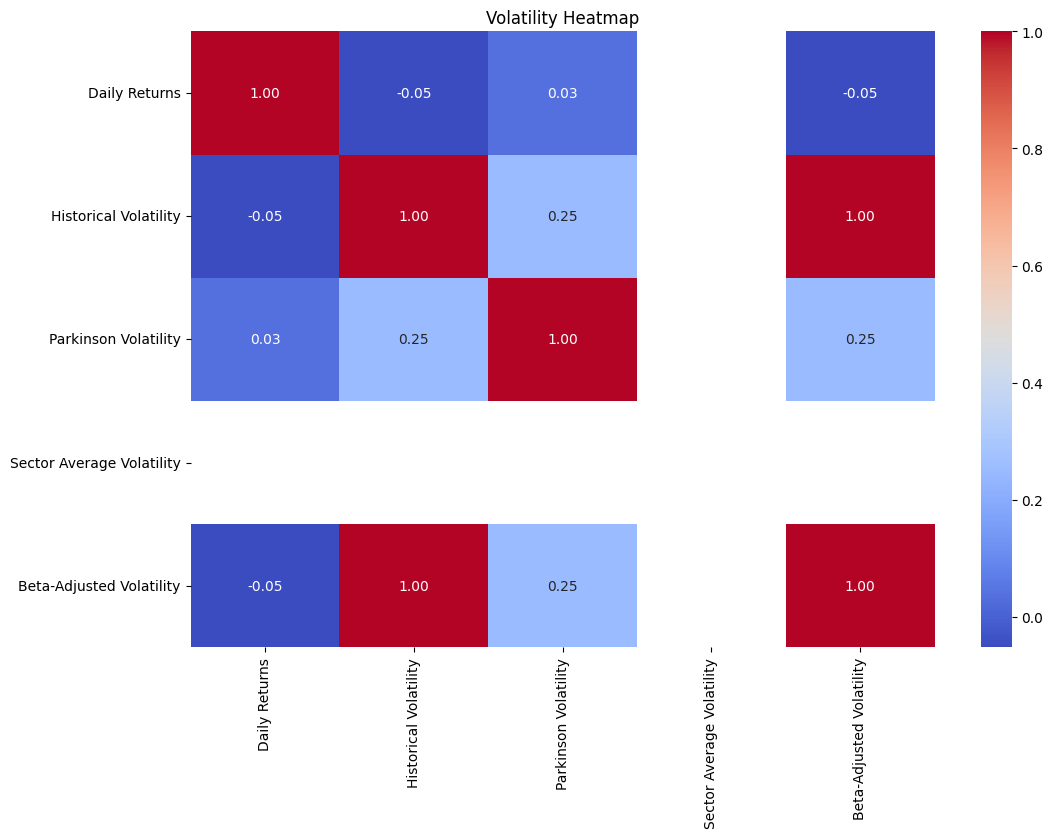

In [13]:
# visuzlize heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Volatility Heatmap")
plt.show()